In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#importing relevant libraries needed for this model
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
import re 
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns 
plt.style.use('ggplot')

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/Text Mining Project/cleaned_30kundersampling.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Text Mining Project/test_cleaned_14k.csv')

In [4]:
df_train

,Unnamed: 0,id,comment_text,severe_toxic,toxic,cleaned_text,count
0,0,c436fcdd4acc928a,naw i am fine see you later guys you rock ) ha...,0,0,nope fine see later guy rock hahahahaha userbi...,44
1,1,17bb9f8b0e2ff008,LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1,0,0,lol reddit pwn lmao unknowntales,28
2,2,e86ae38d7ff0c1ff,You jumped the gun a bit too early - that's my...,0,0,jump gun bit early first revert hour,30
3,3,cb1fcb465bd93930,"No way, Mercedez PWNZ!!",0,0,way mercedez pwnz,15
4,4,140cb8dc1570e423,I noticed it doesn't mention if the real Presi...,0,0,notice mention real president shot,30
...,...,...,...,...,...,...,...
30583,30583,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",0,1,previous conversation fuck shit eating liberal...,804
30584,30584,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,0,1,mischievious pubic hair,21
30585,30585,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,0,1,absurd edits absurd edit great white shark tot...,178
30586,30586,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",0,1,hey listen ever delete edits ever annoy wwe k ...,213


In [5]:
df_train.reset_index(drop=True)


,Unnamed: 0,id,comment_text,severe_toxic,toxic,cleaned_text,count
0,0,c436fcdd4acc928a,naw i am fine see you later guys you rock ) ha...,0,0,nope fine see later guy rock hahahahaha userbi...,44
1,1,17bb9f8b0e2ff008,LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1,0,0,lol reddit pwn lmao unknowntales,28
2,2,e86ae38d7ff0c1ff,You jumped the gun a bit too early - that's my...,0,0,jump gun bit early first revert hour,30
3,3,cb1fcb465bd93930,"No way, Mercedez PWNZ!!",0,0,way mercedez pwnz,15
4,4,140cb8dc1570e423,I noticed it doesn't mention if the real Presi...,0,0,notice mention real president shot,30
...,...,...,...,...,...,...,...
30583,30583,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",0,1,previous conversation fuck shit eating liberal...,804
30584,30584,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,0,1,mischievious pubic hair,21
30585,30585,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,0,1,absurd edits absurd edit great white shark tot...,178
30586,30586,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",0,1,hey listen ever delete edits ever annoy wwe k ...,213


Severe Toxic

In [6]:
df_train.cleaned_text=df_train.cleaned_text.astype(str)

In [7]:
features = list(df_train['cleaned_text'])
targets = df_train['severe_toxic']

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.30, random_state=18)

In [8]:
X_train

['go harshere still remove stenger give source tg continually confuse editor author source material making stuff see psychological projection see recent discussion su stenger wrong either tg pathological liar utterly incapable read technical material usually apply hanlon razor kind dilemmas track record long extensively document opt stupidity explanation action barr absolutely first paper describe flip su derive su paper repeatedly reference anyone would discover even casual google search similarly stenger absolutely correct derendinger paper read paper statement put charitably grossly mislead best le charitably absolute falsehood nothing think disruptive destructive aim wikipedia willingness editor like assert blatant falsehood try push pov article yet persist month month year year outrageous falshoods many document coin long ever set eye article apparently motive protect article write another editor post wiki utterly unacceptable behavior frankly inexplicable since claim easily falsi

In [9]:
def normalize(data):
    normalized = []
    for i in data:
        i = i.lower()
        # get rid of urls
        i = re.sub('https?://\S+|www\.\S+', '', i)
        # get rid of non words and extra spaces
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        normalized.append(i)
    return normalized

X_train = normalize(X_train)
X_test = normalize(X_test)

In [10]:
max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)

In [11]:
# convert text to vectors as our classifer only takes numerical data
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [12]:
#apply padding to ensure that the xtrain and xtest have the same length for each article
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)

In [13]:
#build the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        49664     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               18560     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [14]:
#use early stop to prevent overfitting and when validation loss no longer improve
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


643/643 [==============================] - 260s 381ms/step - loss: 0.2845 - accuracy: 0.9392 - val_loss: 0.2015 - val_accuracy: 0.9486
Epoch 2/10
643/643 [==============================] - 243s 378ms/step - loss: 0.2172 - accuracy: 0.9471 - val_loss: 0.1979 - val_accuracy: 0.9496
Epoch 3/10
643/643 [==============================] - 242s 377ms/step - loss: 0.1613 - accuracy: 0.9433 - val_loss: 0.1413 - val_accuracy: 0.9491
Epoch 4/10
643/643 [==============================] - 247s 384ms/step - loss: 0.1142 - accuracy: 0.9510 - val_loss: 0.1431 - val_accuracy: 0.9500
Epoch 5/10
643/643 [==============================] - 243s 378ms/step - loss: 0.1037 - accuracy: 0.9555 - val_loss: 0.1552 - val_accuracy: 0.9416


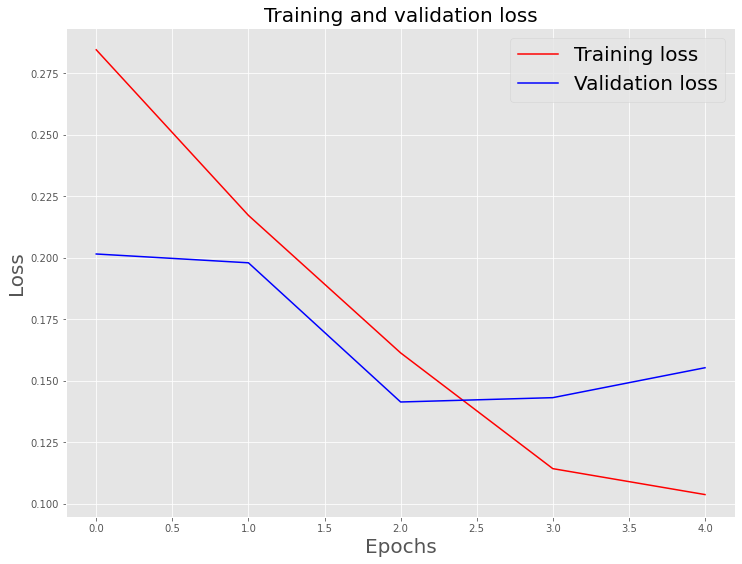

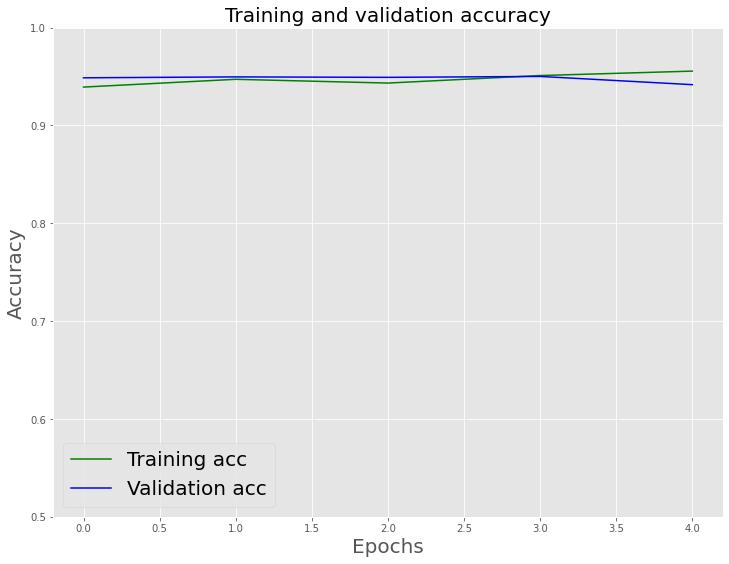

In [15]:
#visualize the training over time
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [16]:
#evaluate the testing set
model.evaluate(X_test, y_test)

287/287 [==============================] - 23s 80ms/step - loss: 0.1335 - accuracy: 0.9494


[0.1334577053785324, 0.9494388103485107]

In [17]:
#preict the trained model and append i to 1 is the value is above 0.5, else 0
pred = model.predict(X_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

In [18]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

Accuracy on testing set: 0.9494388144273728
Precision on testing set: 0.008602150537634409
Recall on testing set: 0.5714285714285714


In [19]:
#import relevant library for confusion matrix
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix

In [20]:
#save weights for visualization
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 32)


In [21]:
#calculating the f1 score
precision = 0.985792349726776
recall = 0.9891900360332132
f1 = 2 * (precision * recall) / (precision + recall)
print(f1)

0.9874882702533625


[[8709  461]
 [   3    4]]


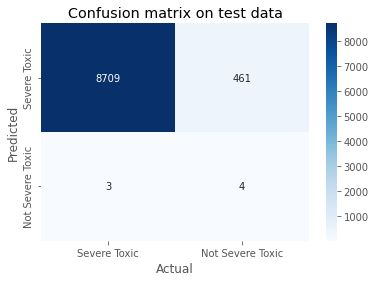

In [22]:
#printing the confusion matrix
print(confusion_matrix(binary_predictions, y_test))

cm = pd.DataFrame(confusion_matrix(binary_predictions, y_test) , index = ['Severe Toxic','Not Severe Toxic'] , columns = ['Severe Toxic','Not Severe Toxic'])
sns.heatmap(cm,cmap= 'Blues', annot = True, fmt='', xticklabels = ['Severe Toxic','Not Severe Toxic'], yticklabels = ['Severe Toxic','Not Severe Toxic'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix on test data')
plt.show()

Toxic

In [23]:
features = list(df_train['cleaned_text'])
targets = df_train['toxic']

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.30, random_state=18)

In [24]:
X_train = normalize(X_train)
X_test = normalize(X_test)

In [25]:
max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)


In [26]:
# convert text to vectors as our classifer only takes numerical data
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [27]:
#apply padding to ensure that the xtrain and xtest have the same length for each article
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)

In [28]:
#build the RNN model
modeltoxic = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

modeltoxic.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        49664     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 32)               18560     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [29]:
#use early stop to prevent overfitting and when validation loss no longer improve
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
modeltoxic.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = modeltoxic.fit(X_train, y_train, epochs=10,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


643/643 [==============================] - 249s 377ms/step - loss: 0.5967 - accuracy: 0.6595 - val_loss: 0.3589 - val_accuracy: 0.8543
Epoch 2/10
643/643 [==============================] - 241s 374ms/step - loss: 0.3028 - accuracy: 0.8821 - val_loss: 0.2801 - val_accuracy: 0.8847
Epoch 3/10
643/643 [==============================] - 241s 375ms/step - loss: 0.2251 - accuracy: 0.9191 - val_loss: 0.2579 - val_accuracy: 0.8936
Epoch 4/10
643/643 [==============================] - 241s 375ms/step - loss: 0.1839 - accuracy: 0.9379 - val_loss: 0.2557 - val_accuracy: 0.8996
Epoch 5/10
643/643 [==============================] - 241s 375ms/step - loss: 0.1538 - accuracy: 0.9507 - val_loss: 0.2757 - val_accuracy: 0.9001
Epoch 6/10
643/643 [==============================] - 241s 375ms/step - loss: 0.1318 - accuracy: 0.9578 - val_loss: 0.2735 - val_accuracy: 0.8992


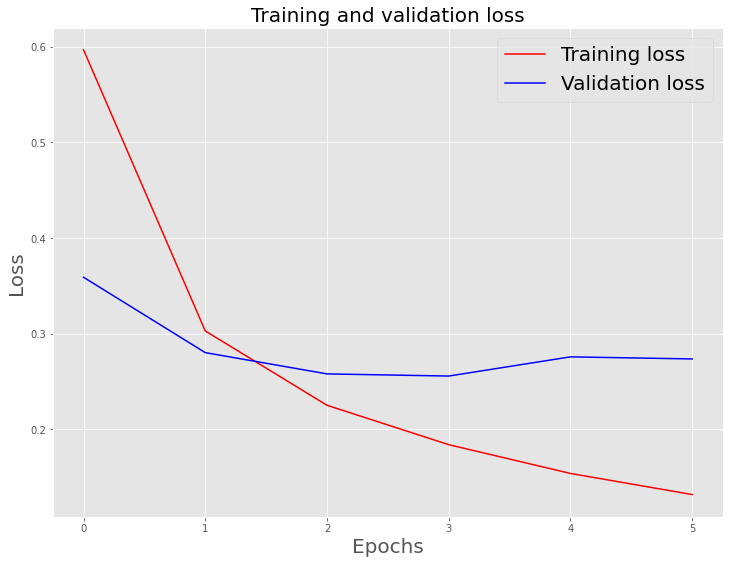

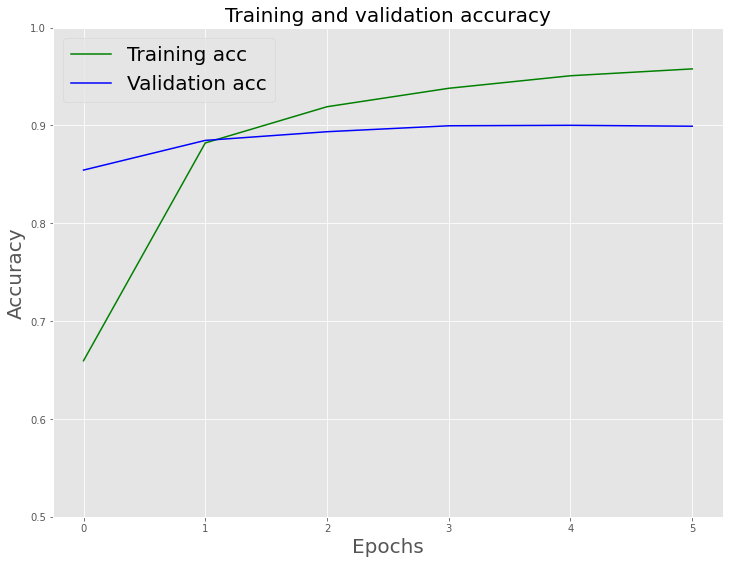

In [30]:
#visualize the training over time
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [31]:
#evaluate the testing set
modeltoxic.evaluate(X_test, y_test)

287/287 [==============================] - 22s 78ms/step - loss: 0.2869 - accuracy: 0.8898


[0.2869325280189514, 0.8898332715034485]

In [32]:
#preict the trained model and append i to 1 is the value is above 0.5, else 0
pred2 = modeltoxic.predict(X_test)

binary_predictions2 = []

for i in pred2:
    if i >= 0.5:
        binary_predictions2.append(1)
    else:
        binary_predictions2.append(0) 

In [33]:
print('Accuracy on testing set:', accuracy_score(binary_predictions2, y_test))
print('Precision on testing set:', precision_score(binary_predictions2, y_test))
print('Recall on testing set:', recall_score(binary_predictions2, y_test))

Accuracy on testing set: 0.8898332788492972
Precision on testing set: 0.8885482811473615
Recall on testing set: 0.8899122807017544


In [34]:
#save weights for visualization
e2 = modeltoxic.layers[0]
weights2 = e2.get_weights()[0]
print(weights2.shape) # shape: (vocab_size, embedding_dim)

(10000, 32)


In [35]:
#calculating the f1 score
precision = 0.985792349726776
recall = 0.9891900360332132
f1 = 2 * (precision * recall) / (precision + recall)
print(f1)

0.9874882702533625


[[4610 4560]
 [   0    7]]


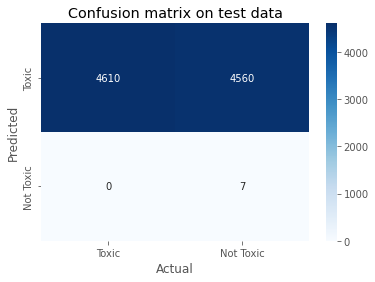

In [36]:
#printing the confusion matrix
print(confusion_matrix(binary_predictions, y_test))

cm = pd.DataFrame(confusion_matrix(binary_predictions, y_test) , index = ['Toxic','Not Toxic'] , columns = ['Toxic','Not Toxic'])
sns.heatmap(cm,cmap= 'Blues', annot = True, fmt='', xticklabels = ['Toxic','Not Toxic'], yticklabels = ['Toxic','Not Toxic'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix on test data')
plt.show()

Predicting on Test Data

In [37]:
df_test.cleaned_text=df_test.cleaned_text.astype(str)

In [38]:
features = list(df_test['cleaned_text'])

In [39]:
Test_data = normalize(features)

In [40]:
max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(Test_data)

In [41]:
# convert text to vectors as our classifer only takes numerical data
Test_data = tokenizer.texts_to_sequences(Test_data)

In [42]:
Test_data = tf.keras.preprocessing.sequence.pad_sequences(Test_data, padding='post', maxlen=25)

Severe Toxic

In [43]:
#preict the trained model and append i to 1 is the value is above 0.5, else 0
pred3 = model.predict(Test_data)

binary_predictions3 = []

for i in pred3:
    if i >= 0.5:
        binary_predictions3.append(1)
    else:
        binary_predictions3.append(0) 

In [44]:
df_test['Severe_Toxic'] = binary_predictions3

In [45]:
df_test

,id,comment_text,cleaned_text,count,Severe_Toxic
0,9bf33f071c9b3263,""" \n : ) No charge. Happy I was there to catch...",charge happy catch,16,0
1,39663d63a79f841b,==Thanks== \n For cleaning up the wp in wa issue!,thanks clean wp wa issue,20,0
2,2b8aa65b64094d44,Why are people keen to act upon their whims an...,people keen act upon whim put spoiler rather s...,283,0
3,b21145e7025ea830,This Artist is FAKE! \n\n * \n\n https://www...,artist fake person shallow heartless quick tur...,226,0
4,4c24b0fa5c3e0db0,""" \n\n == Come by the Talk Page == \n\n Hey Bb...",come talk page hey bb come talk page redrafted...,159,0
...,...,...,...,...,...
13995,9b18410be1be57df,it is so gay!!!!!!!,gay,3,0
13996,6ee0461dee335c37,==ISBN== \n Thanks fo rhe info. Had no idea. ...,isbn thanks fo rhe info idea copy usage page w...,51,0
13997,062ad44640ce09ba,== Neutrality disputed == \n I added to sever...,neutrality dispute add several statement clear...,277,0
13998,ccb0a3fc6168d4a5,"User:Gert7|Gert7]] 10:34,",usergert gert,12,0


In [46]:
len(binary_predictions3)

14000

Toxic

In [47]:
#preict the trained model and append i to 1 is the value is above 0.5, else 0
pred4 = modeltoxic.predict(Test_data)

binary_predictions4 = []

for i in pred4:
    if i >= 0.5:
        binary_predictions4.append(1)
    else:
        binary_predictions4.append(0) 

In [48]:
df_test['Toxic'] = binary_predictions4

In [49]:
df_test

,id,comment_text,cleaned_text,count,Severe_Toxic,Toxic
0,9bf33f071c9b3263,""" \n : ) No charge. Happy I was there to catch...",charge happy catch,16,0,1
1,39663d63a79f841b,==Thanks== \n For cleaning up the wp in wa issue!,thanks clean wp wa issue,20,0,1
2,2b8aa65b64094d44,Why are people keen to act upon their whims an...,people keen act upon whim put spoiler rather s...,283,0,1
3,b21145e7025ea830,This Artist is FAKE! \n\n * \n\n https://www...,artist fake person shallow heartless quick tur...,226,0,1
4,4c24b0fa5c3e0db0,""" \n\n == Come by the Talk Page == \n\n Hey Bb...",come talk page hey bb come talk page redrafted...,159,0,1
...,...,...,...,...,...,...
13995,9b18410be1be57df,it is so gay!!!!!!!,gay,3,0,1
13996,6ee0461dee335c37,==ISBN== \n Thanks fo rhe info. Had no idea. ...,isbn thanks fo rhe info idea copy usage page w...,51,0,1
13997,062ad44640ce09ba,== Neutrality disputed == \n I added to sever...,neutrality dispute add several statement clear...,277,0,0
13998,ccb0a3fc6168d4a5,"User:Gert7|Gert7]] 10:34,",usergert gert,12,0,1


In [50]:
df_test.to_csv('/content/drive/MyDrive/Text Mining Project/Test_Data_Predictions.csv')

In [51]:
print(len(df_test[df_test['Severe_Toxic'] == 1]))

0


In [52]:
print(len(df_test[df_test['Toxic'] == 0]))

3378
